In [1]:
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")

# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Train-test split
from sklearn.model_selection import train_test_split

# Models
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model evaluation
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

# setting logging to print only error messages from Sklearnex
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers (1).csv


In [3]:
df = pd.read_csv("AirPassengers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Month           144 non-null    object
 1   Passengers (k)  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.sort_values(by=['Month'], inplace=True, ascending=True)

In [7]:
df.set_index("Month", inplace=True)

<Axes: xlabel='Month'>

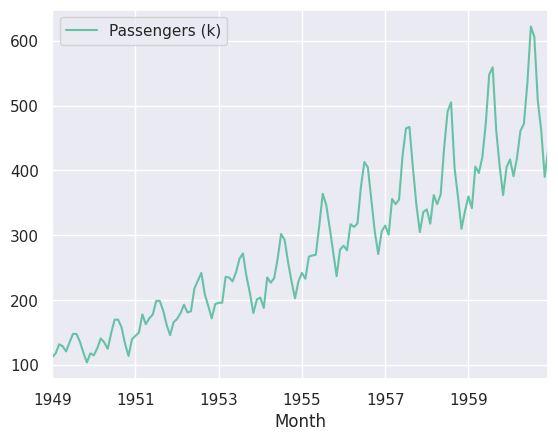

In [8]:
df.plot()

In [9]:
df['time period'] = range(1,len(df)+1)

In [10]:
df.head()

,Passengers (k),time period
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5


In [11]:
# Defining the predictor X and target y
X = df[['time period']]
y = df['Passengers (k)']

# Splitting the data into
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    shuffle=False)

In [12]:
X_train.shape, y_train.shape

((115, 1), (115,))

In [13]:
X_test.shape, y_test.shape

((29, 1), (29,))

In [14]:
X_train.head()

,time period
Month,
1949-01-01,1
1949-02-01,2
1949-03-01,3
1949-04-01,4
1949-05-01,5


In [15]:
y_train.head()

,Passengers (k)
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

# Initializing the linear regression model
lr = LinearRegression()

# Training the model on the training data available
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Making predictions on the testing data
y_pred_lr = lr.predict(X_test)

In [18]:
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)
print(f"R-squared: {lr.score(X_train, y_train):.2f}")

Coefficient: [2.51357216]
Intercept: 94.16064073226545
R-squared: 0.84


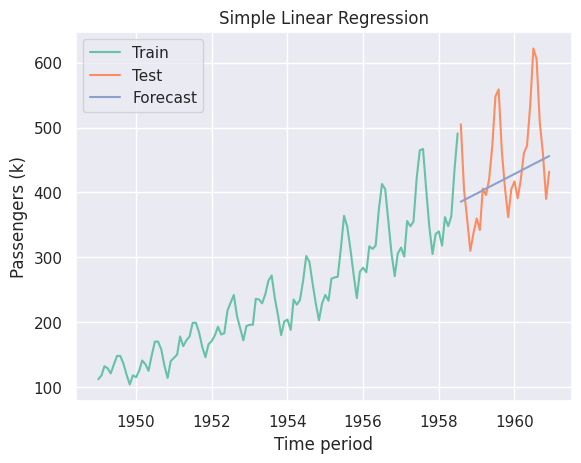

In [19]:
# Plot the train, test, and forecast data with 'Month' on the x-axis
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_test.index, y_pred_lr, label="Forecast")

# Add title and legend to the plot
plt.title("Simple Linear Regression")
plt.xlabel("Time period")  # Label the x-axis
plt.ylabel("Passengers (k)")  # Label the y-axis
plt.legend()
plt.show()

In [20]:
mae_lr = mae(y_test, y_pred_lr)
mape_lr = mape(y_test, y_pred_lr)

print(f"The MAE is {mae_lr:.2f}")
print(f"The MAPE is {100 * mape_lr:.2f} %")

The MAE is 55.99
The MAPE is 12.07 %


# Multiple Linear Regression

In [21]:
df.head()

,Passengers (k),time period
Month,,
1949-01-01,112,1
1949-02-01,118,2
1949-03-01,132,3
1949-04-01,129,4
1949-05-01,121,5


In [22]:
# Create a column for month
df['month'] = df.index.month

In [23]:
df.head()

,Passengers (k),time period,month
Month,,,
1949-01-01,112,1,1
1949-02-01,118,2,2
1949-03-01,132,3,3
1949-04-01,129,4,4
1949-05-01,121,5,5


In [24]:
df_mlr = pd.concat([
    pd.get_dummies(df['month'], drop_first=True, dtype=int),
    df[['time period', 'Passengers (k)']]
], axis=1)

In [25]:
df_mlr.head()

,2,3,4,5,6,7,8,9,10,11,12,time period,Passengers (k)
Month,,,,,,,,,,,,,
1949-01-01,0,0,0,0,0,0,0,0,0,0,0,1,112
1949-02-01,1,0,0,0,0,0,0,0,0,0,0,2,118
1949-03-01,0,1,0,0,0,0,0,0,0,0,0,3,132
1949-04-01,0,0,1,0,0,0,0,0,0,0,0,4,129
1949-05-01,0,0,0,1,0,0,0,0,0,0,0,5,121


In [26]:
X = df_mlr.drop(columns=['Passengers (k)'])
y = df_mlr['Passengers (k)']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, shuffle=False)

In [28]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [29]:
model_mlr = sm.OLS(y_train, X_train_sm).fit()

In [34]:
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Passengers (k)   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.79e-62
Time:                        06:35:45   Log-Likelihood:                -504.74
No. Observations:                 115   AIC:                             1035.
Df Residuals:                     102   BIC:                             1071.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          74.7668      7.287     10.260      0.000      60.313      89.221
2              -6.2024      9.257     -0.670      0.504     -24.564      12.159
3              24.2952      9.258      2.624      0.010       5.933      42.658
4              14.8927      9.258      1.609      0.111      -3.471      33.257
5              14.5903      9.260      1.576      0.118      -3.776      32.957
6              48.3879      9.261      5.225      0.000      30.018      66.758
7              77.1855      9.263      8.332      0.000      58.811      95.559
8              67.6531      9.511      7.113      0.000      48.789      86.518
9              33.0396      9.511      3.474      0.001      14.174      51.905
10             -0.7962      9.512     -0.084      0.933     -19.663      18.071
11            -29.9652      9.513     -3.150      0.002     -48.835     -11.096
12             -6.2454      9.515     -0.656      0.513     -25.118      12.627
time period     2.5024      0.058     42.975      0.000       2.387       2.618
==============================================================================
Omnibus:                       13.222   Durbin-Watson:                   0.402
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.082
Skew:                           0.807   Prob(JB):                     0.000875
Kurtosis:                       3.580   Cond. No.                         816.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
y_pred_mlr = model_mlr.predict(X_test_sm)

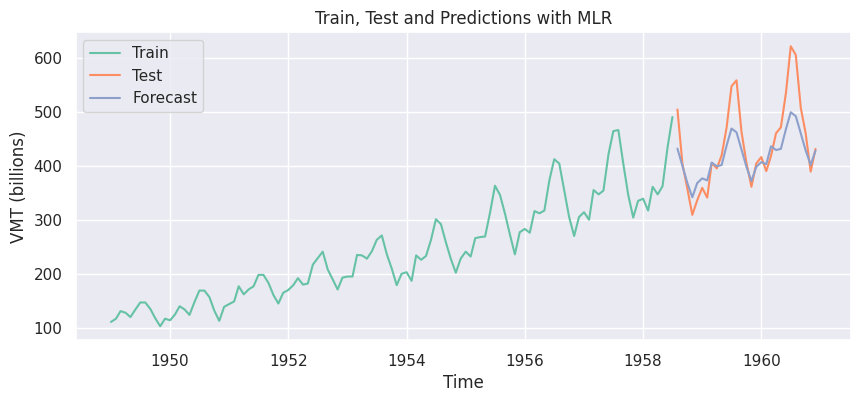

In [32]:
# Set the size of the plot to 10 inches by 4 inches
plt.figure(figsize=(10, 4))

# Plot the train, test, and forecast
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred_mlr, label="Forecast")

# Add title and legend to the plot
plt.title("Train, Test and Predictions with MLR")
plt.xlabel("Time")  # Label the x-axis
plt.ylabel("VMT (billions)")  # Label the y-axis
plt.legend()
plt.show()

In [33]:
# Calculate evaluation metrics
mae = mae(y_test, y_pred_mlr)
mape = mape(y_test, y_pred_mlr)

# Print the R-squared value from the OLS model
print(f"R-squared: {model_mlr.rsquared:.2f}")
print(f"The MAE is {mae:.2f}")
print(f"The MAPE is {100 * mape:.2f} %")

R-squared: 0.95
The MAE is 34.32
The MAPE is 7.09 %


The performance of MLR is very much better than that of SLR as the MLR considers both trend and seasonality.

# **Citing this notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/tree/main